In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler



Importation des données

In [67]:
df=pd.read_csv("D:\Master2\Mes_projets\Bank_marketing\data_banking_marketing.csv")

In [68]:
## Les premières lignes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [70]:
job_counts=df["job"].value_counts()

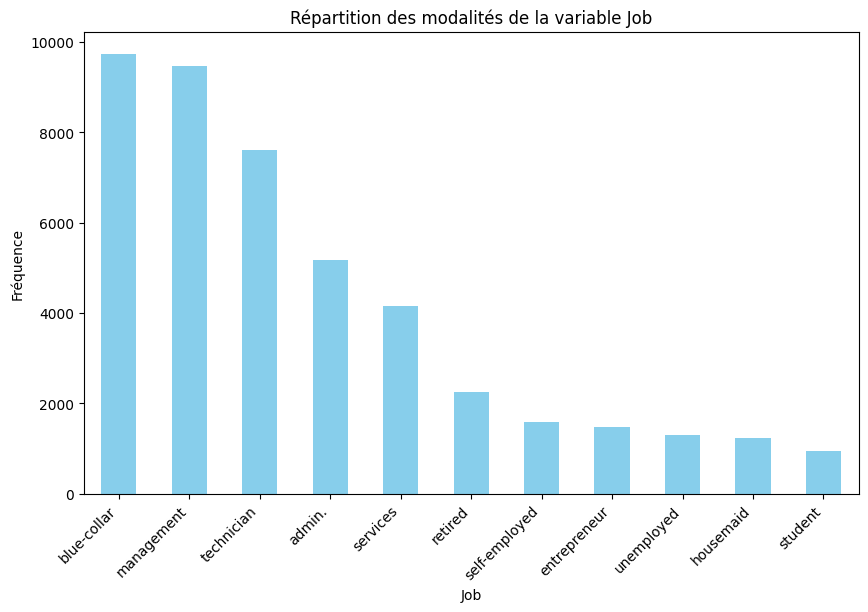

In [71]:
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de la variable Job')
plt.xlabel('Job')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.savefig("histo_job.png")
plt.show()



Barplot pour voir la proportion de oui et non pour chaque modalités de "job"

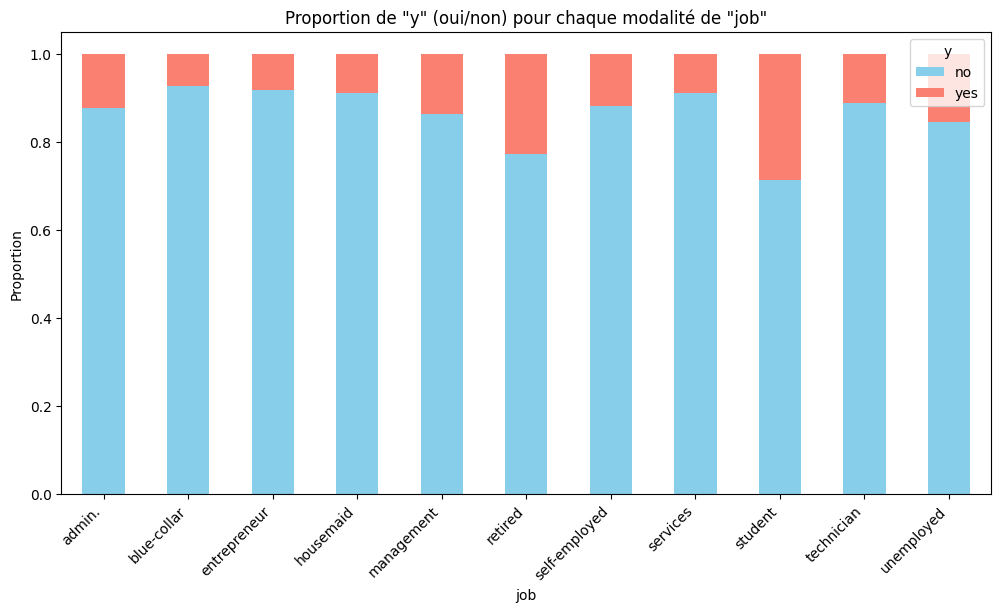

In [11]:
job_y_counts = pd.crosstab(df['job'], df['y'])


job_y_proportions = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)


job_y_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "job"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')
plt.show()


In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [14]:
df["marital"].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

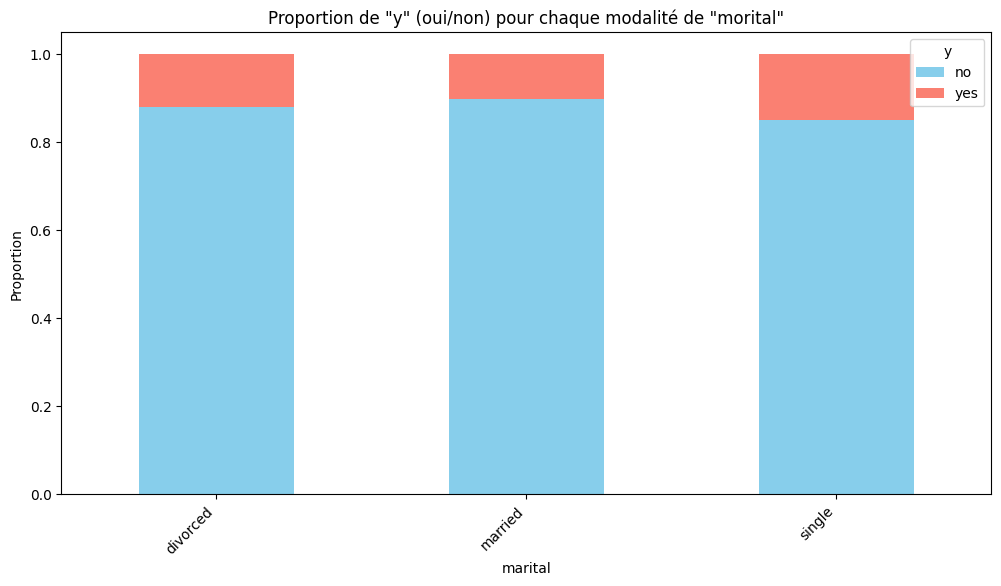

In [15]:
job_y_counts = pd.crosstab(df['marital'], df['y'])


job_y_proportions = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)


job_y_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "morital"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')
plt.show()


In [16]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

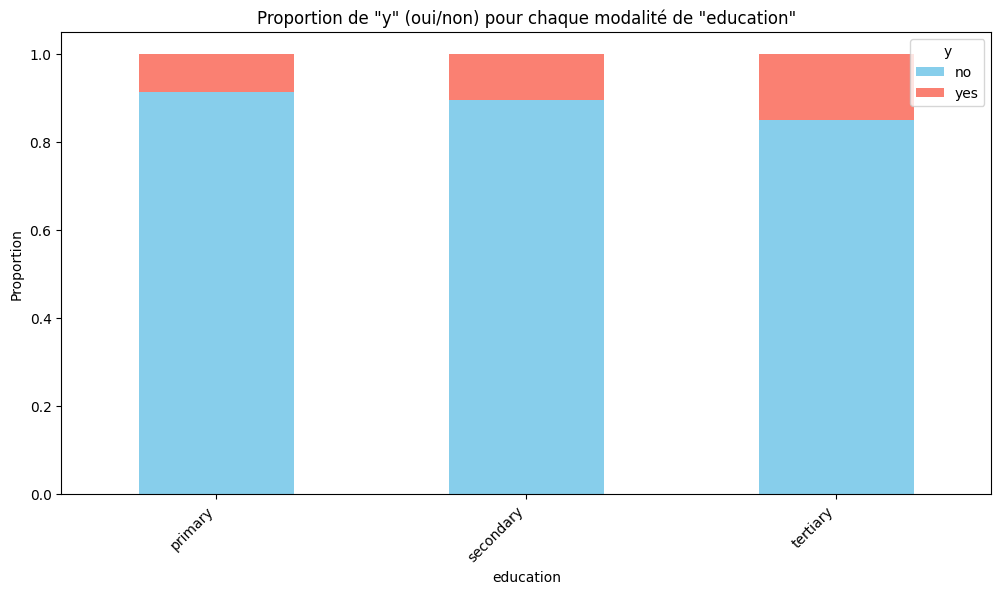

In [17]:
job_y_counts = pd.crosstab(df['education'], df['y'])


job_y_proportions = job_y_counts.div(job_y_counts.sum(axis=1), axis=0)


job_y_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "education"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')
plt.show()

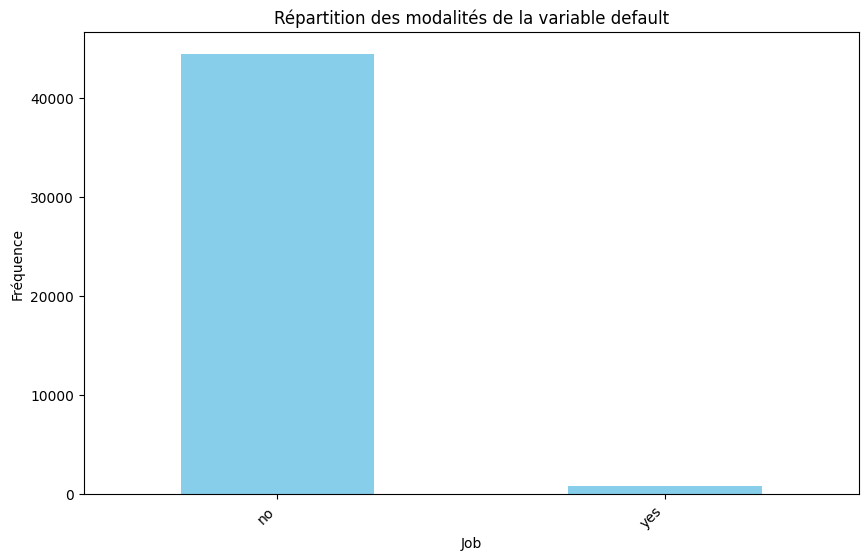

In [19]:
dfault=df["default"].value_counts()
plt.figure(figsize=(10, 6))
dfault.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de la variable default')
plt.xlabel('Job')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.show()


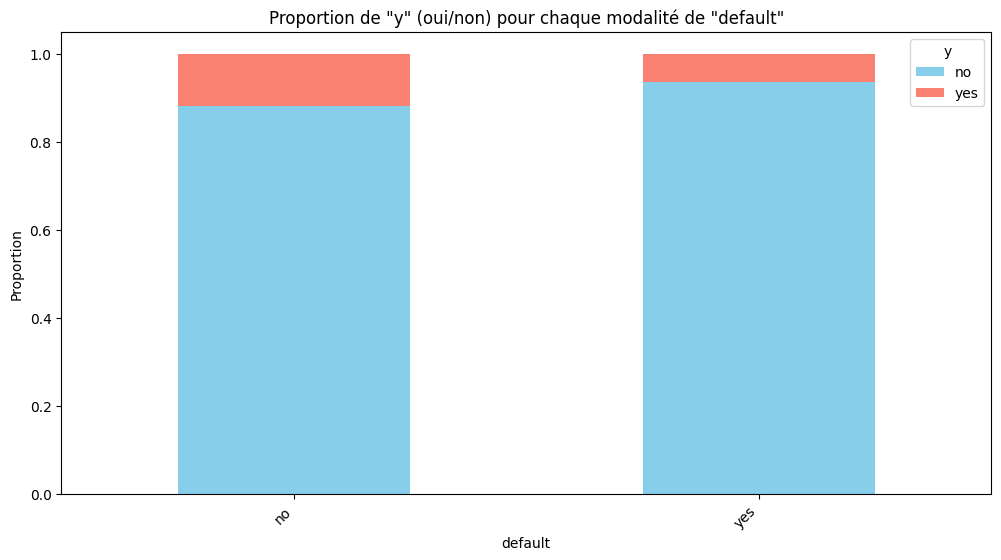

In [23]:
default_y_counts = pd.crosstab(df['default'], df['y'])


defalut_y_proportions = default_y_counts.div(default_y_counts.sum(axis=1), axis=0)


defalut_y_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "default"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')
plt.show()

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


<Axes: xlabel='y', ylabel='balance'>

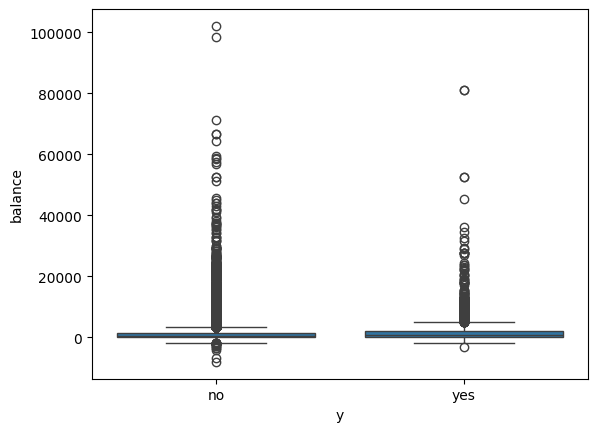

In [27]:
sns.boxplot(x="y",y="balance",data=df)

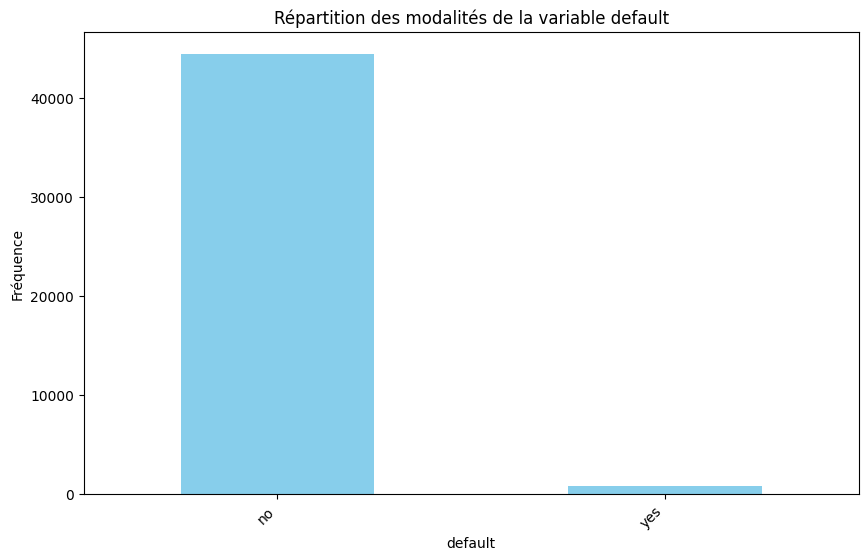

In [25]:
defau=df["default"].value_counts()
plt.figure(figsize=(10, 6))
defau.plot(kind='bar', color='skyblue')
plt.title('Répartition des modalités de la variable default')
plt.xlabel('default')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.show()

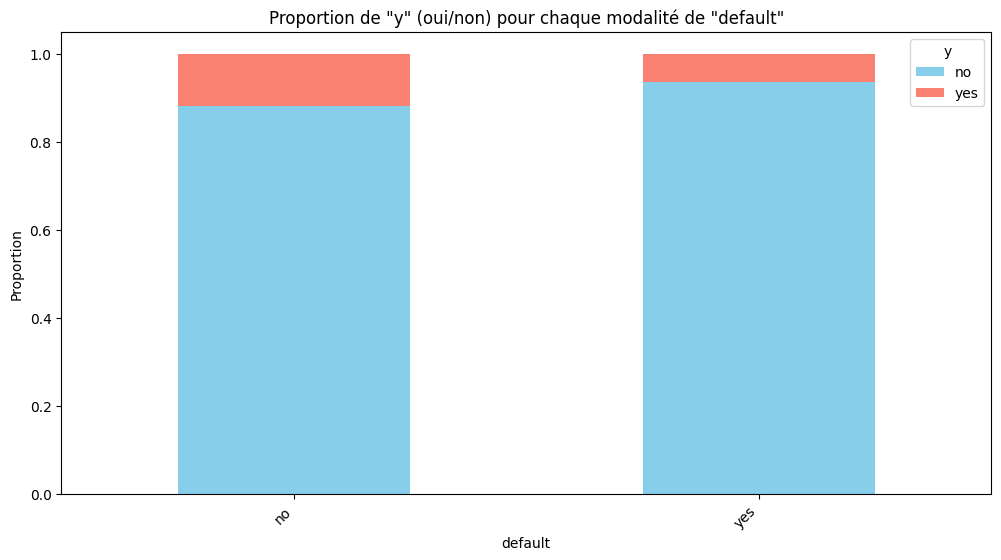

In [26]:
loan = pd.crosstab(df['default'], df['y'])


loana = loan.div(loan.sum(axis=1), axis=0)


loana.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "default"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')
plt.show()

Proportion de oui /non par mois 

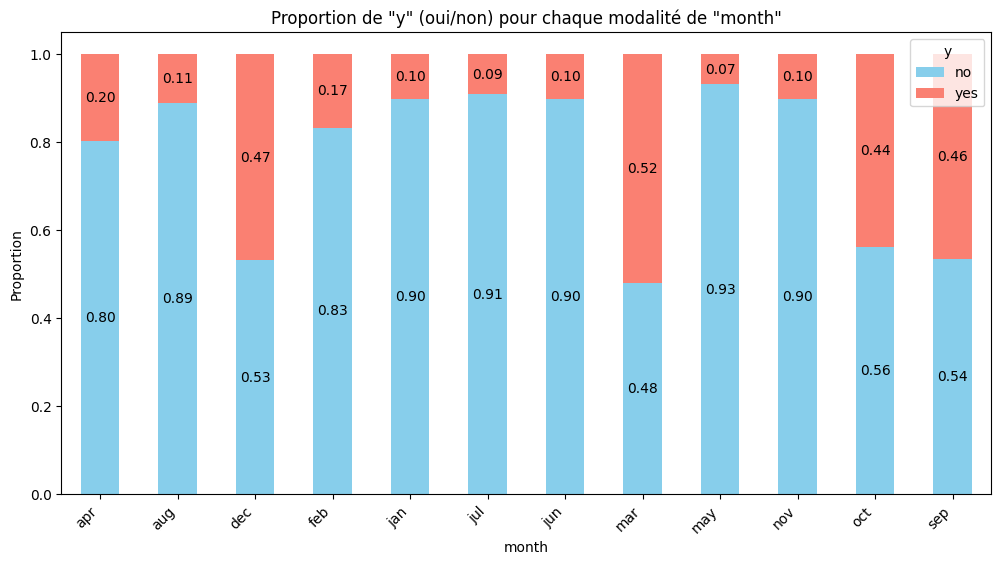

In [35]:


# Tableau croisé normalisé
month = pd.crosstab(df['month'], df['y'])
montha = month.div(month.sum(axis=1), axis=0)

# Création du graphique en barres empilées
ax = montha.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])

# Ajout du titre et des étiquettes
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "month"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')

# Ajout des annotations sur chaque barre
for p in ax.patches:
    width = p.get_width()   # Largeur de la barre
    height = p.get_height() # Hauteur de la barre (proportion)
    x = p.get_x() + width / 2  # Position en x du centre de la barre
    y = p.get_y() + height / 2 # Position en y du centre de la barre
    if height > 0:  # Si la hauteur n'est pas nulle
        ax.text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Affichage du graphique
plt.show()


In [41]:
proportion_na = pd.DataFrame({
    "proportion_na": np.round(df.isna().sum() / len(df),2)
})
proportion_na

,proportion_na
age,0.00
job,0.01
marital,0.00
education,0.04
default,0.00
balance,0.00
housing,0.00
loan,0.00
contact,0.29
day_of_week,0.00


In [42]:
df["contact"].value_counts()

contact
cellular     29285
telephone     2906
Name: count, dtype: int64

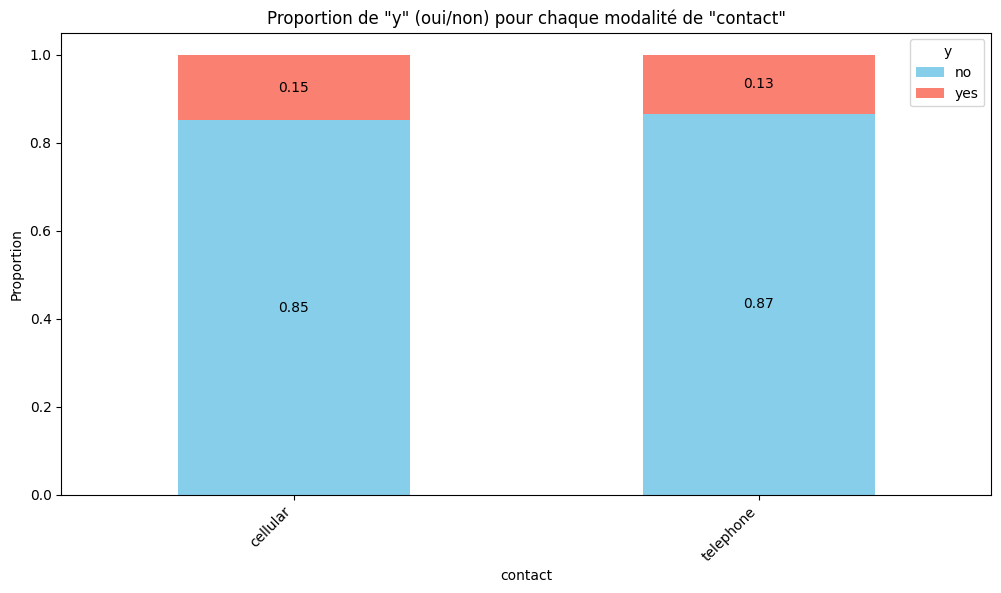

In [45]:


# Tableau croisé normalisé
contact = pd.crosstab(df['contact'], df['y'])
contacta = contact.div(contact.sum(axis=1), axis=0)

# Création du graphique en barres empilées
ax = contacta.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])

# Ajout du titre et des étiquettes
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "contact"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')

# Ajout des annotations sur chaque barre
for p in ax.patches:
    width = p.get_width()   # Largeur de la barre
    height = p.get_height() # Hauteur de la barre (proportion)
    x = p.get_x() + width / 2  # Position en x du centre de la barre
    y = p.get_y() + height / 2 # Position en y du centre de la barre
    if height > 0:  # Si la hauteur n'est pas nulle
        ax.text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Affichage du graphique
plt.show()


In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


<Axes: xlabel='y', ylabel='duration'>

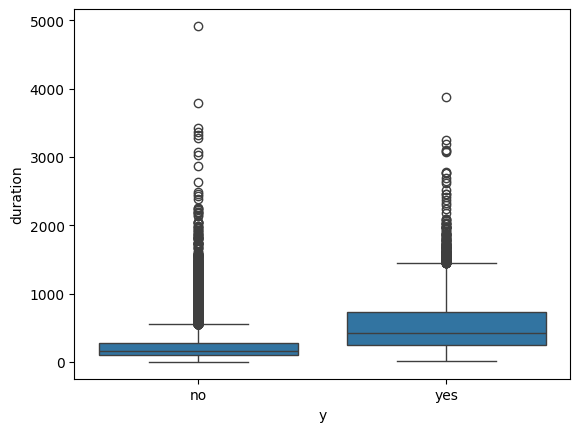

In [47]:
sns.boxplot(x="y",y="duration",data=df)

<Axes: xlabel='y', ylabel='campaign'>

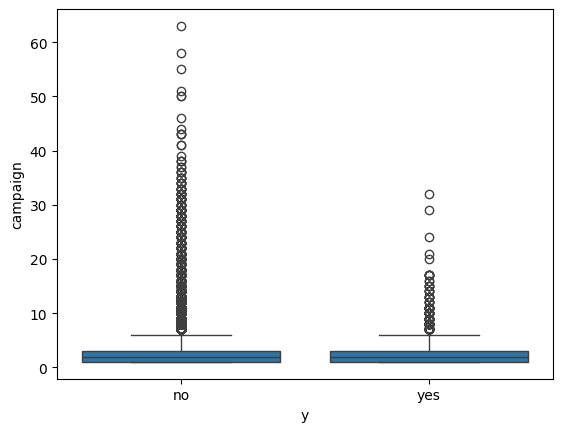

In [48]:
sns.boxplot(x="y",y="campaign",data=df)

In [54]:


df["pdays"].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

<Axes: xlabel='y', ylabel='pdays'>

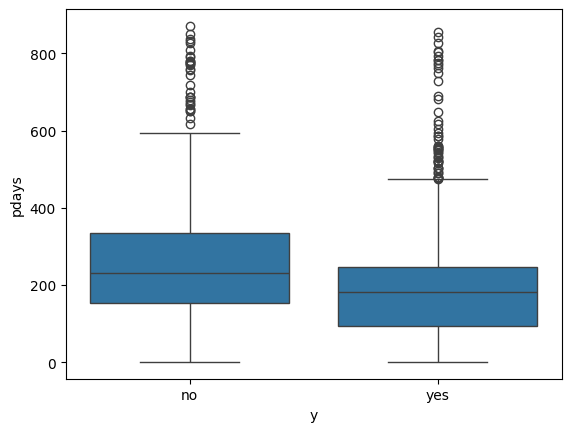

In [56]:
sns.boxplot(x=df[df["pdays"]!=-1]["y"],y=df[df["pdays"]!=-1]["pdays"])  #### visualisez si nombre de jours qui se sont écoulés après que le client a été contacté pour la dernière fois lors d'un précédent influence le choix du clien

Influence de la variable poutcome sur le choix du client

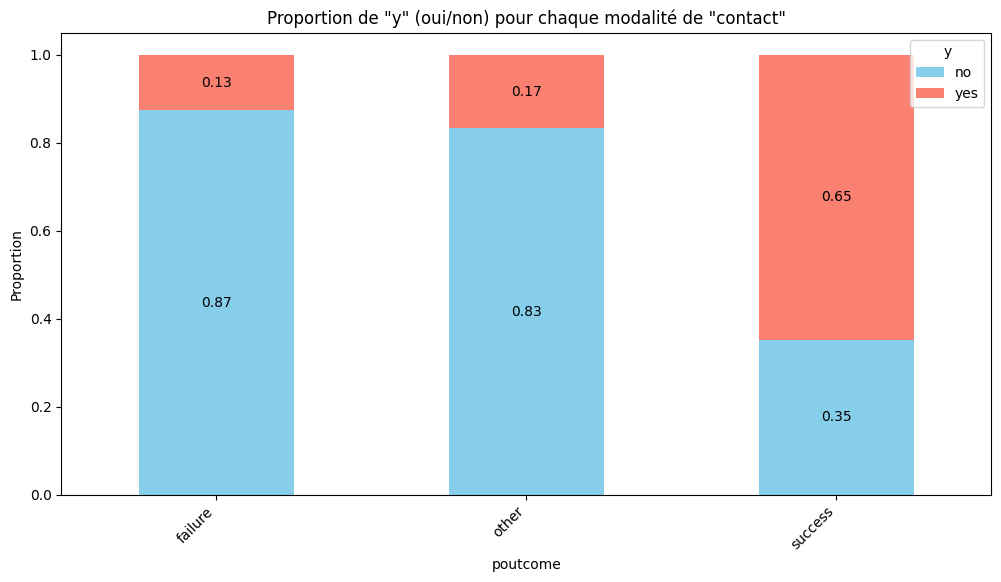

In [62]:
# Tableau croisé normalisé
poutcome = pd.crosstab(df['poutcome'], df['y'])
poutcomea = poutcome.div(poutcome.sum(axis=1), axis=0)

# Création du graphique en barres empilées
ax = poutcomea.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])

# Ajout du titre et des étiquettes
plt.title('Proportion de "y" (oui/non) pour chaque modalité de "contact"')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='y', loc='upper right')

# Ajout des annotations sur chaque barre
for p in ax.patches:
    width = p.get_width()   # Largeur de la barre
    height = p.get_height() # Hauteur de la barre (proportion)
    x = p.get_x() + width / 2  # Position en x du centre de la barre
    y = p.get_y() + height / 2 # Position en y du centre de la barre
    if height > 0:  # Si la hauteur n'est pas nulle
        ax.text(x, y, f'{height:.2f}', ha='center', va='center', color='black')

# Affichage du graphique
plt.show()

Nettoyage des données ou preprocessing

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
df["job"].value_counts

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

Encodage de la variable Job 

In [12]:
# Fonction pour regrouper les jobs en classes
dico_job={'blue-collar':'Emplois_col_bleu', 'technician':'Emplois_col_bleu', 'housemaid':'Emplois_col_bleu', 'services':'Emplois_col_bleu',
          'management':'Emplois_de_gestion','admin.':'Emplois_de_gestion','self-employed':'Indépendants', 'entrepreneur':'Indépendants','retired':"inactif", 'unemployed':"inactif", 'student':"inactif"}

df["job_categorie"]=df["job"].map(dico_job)

In [19]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,job_categorie,marital_code
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,Emplois_de_gestion,2
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,Emplois_col_bleu,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,Indépendants,2
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,Emplois_col_bleu,2
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,NaN,1


Traitement de la variable Marital

In [16]:
df["marital"].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [18]:
df["marital_code"]=df["marital"].map({"married":2,"single":1,"divorced":0}) ### encodage des modalités du statut socila

Traitement et encodage de la variable 

In [20]:
df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [21]:
df["education_code"]=df["education"].map({"primary":0,'secondary':1,"tertiary":2})

Traitement et encode de la variable default(si le client a un crédit en défaut)

In [22]:
df["default"].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [24]:
df["default_code"]=df["default"].map({"yes":1,"no":0})

Traitement et encodage de la variable housing

In [35]:
df["housing_code"]=df["housing"].map({"yes":1,"no":0})

traitement et encodage de la variable loan

In [37]:
df["loan_code"]=df["loan"].map({"yes":1,"no":0})

Nous allons supprimer la variable contact car elle n'apporte vraiment pas d'information sur le choix du client.En outre,elle plusieurs valeurs manquantes

In [41]:
df=df.drop(columns="contact",axis=1)

In [4]:
df=pd.read_csv("D:\Master2\Mes_projets\df_bank_marketing_goodd.csv")

In [5]:
df.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,y,job_categorie,marital_code,education_code,default_code,housing_code,loan_code,month_code,poutcome_code
0,58,2143,5,261,1,-1,0,0,Emplois_de_gestion,2,2.0,0,1,0,5,NaN
1,44,29,5,151,1,-1,0,0,Emplois_col_bleu,1,1.0,0,1,0,5,NaN
2,33,2,5,76,1,-1,0,0,Indépendants,2,1.0,0,1,1,5,NaN
3,47,1506,5,92,1,-1,0,0,Emplois_col_bleu,2,NaN,0,1,0,5,NaN
4,33,1,5,198,1,-1,0,0,NaN,1,NaN,0,0,0,5,NaN


In [7]:
df["job_categorie"].value_counts()

job_categorie
Emplois_col_bleu      22723
Emplois_de_gestion    14629
inactif                4505
Indépendants           3066
Name: count, dtype: int64

In [19]:
df["job_categorie"]=df["job_categorie"].fillna("Emplois_col_bleu")

In [20]:
df["poutcome_code"]=df["poutcome_code"].fillna(1)

In [24]:
df.isna().sum()

age               0
balance           0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
y                 0
job_categorie     0
marital_code      0
education_code    0
default_code      0
housing_code      0
loan_code         0
month_code        0
poutcome_code     0
dtype: int64

In [26]:
df.dtypes

age                 int64
balance             int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
y                   int64
job_categorie      object
marital_code        int64
education_code    float64
default_code        int64
housing_code        int64
loan_code           int64
month_code          int64
poutcome_code     float64
dtype: object

In [22]:
df["education_code"].value_counts()

education_code
1.0    23202
2.0    13301
0.0     6851
Name: count, dtype: int64

In [23]:
df["education_code"]=df["education_code"].fillna(1)

In [28]:
df["job_categorie"].value_counts()

job_categorie
Emplois_col_bleu      23011
Emplois_de_gestion    14629
inactif                4505
Indépendants           3066
Name: count, dtype: int64

In [29]:
df["job_categorie"]=df["job_categorie"].map({"Inactif":0,"Indépendants":1,"Emplois_col_bleu":2,"Emplois_de_gestion":3})

In [40]:
df["job_categorie"].value_counts()

job_categorie
2.0    23011
3.0    14629
1.0     3066
Name: count, dtype: int64

In [41]:
df["job_categorie"]=df["job_categorie"].fillna(2)

In [42]:
df_sans_y=df.drop("y",axis=1)
y=df["y"]

In [34]:
df_sans_y.head()  ## df après néttoyange et traitement 

,age,balance,day_of_week,duration,campaign,pdays,previous,job_categorie,marital_code,education_code,default_code,housing_code,loan_code,month_code,poutcome_code
0,58,2143,5,261,1,-1,0,3.0,2,2.0,0,1,0,5,1.0
1,44,29,5,151,1,-1,0,2.0,1,1.0,0,1,0,5,1.0
2,33,2,5,76,1,-1,0,1.0,2,1.0,0,1,1,5,1.0
3,47,1506,5,92,1,-1,0,2.0,2,1.0,0,1,0,5,1.0
4,33,1,5,198,1,-1,0,2.0,1,1.0,0,0,0,5,1.0


In [35]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

Implémentation des méthodes

In [43]:
# Chargement des données
# Remplace X et y par tes propres données
# X : les features
# y : la cible (par exemple 0 ou 1 pour indiquer si le client souscrit ou non)

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(df_sans_y, y, test_size=0.2, random_state=42)


In [39]:
df_sans_y.isna().sum()

age                  0
balance              0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
job_categorie     4505
marital_code         0
education_code       0
default_code         0
housing_code         0
loan_code            0
month_code           0
poutcome_code        0
dtype: int64

                            La  Régression Logistique

In [57]:
# Modèle de régression logistique
log_reg = LogisticRegression(solver='saga', max_iter=500)


# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_log_reg_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilités nécessaires pour la courbe ROC


                  forèt aléatoire

In [58]:
# Modèle de forêt aléatoire
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_rf_prob = random_forest.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la courbe ROC


                                   Le SVM

In [59]:
# Modèle SVM
svm = SVC(probability=True, random_state=42)  # La probabilité=True est nécessaire pour obtenir la courbe ROC
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_svm_prob = svm.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la courbe ROC


Comparaison des modèles : Évaluation et Graphiques

In [60]:
# Fonction pour calculer les métriques
def calculate_metrics(y_true, y_pred, y_pred_prob=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
    }
    if y_pred_prob is not None:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred_prob)
    return metrics

# Calcul des métriques pour chaque modèle
metrics_log_reg = calculate_metrics(y_test, y_pred_log_reg, y_pred_log_reg_prob)
metrics_rf = calculate_metrics(y_test, y_pred_rf, y_pred_rf_prob)
metrics_svm = calculate_metrics(y_test, y_pred_svm, y_pred_svm_prob)

# Affichage des résultats
results = pd.DataFrame({
    'Logistic Regression': metrics_log_reg,
    'Random Forest': metrics_rf,
    'SVM': metrics_svm
})

print(results)


           Logistic Regression  Random Forest       SVM
Accuracy              0.894615       0.900476  0.896384
Precision             0.635294       0.644478  0.659751
Recall                0.296975       0.390467  0.291476
F1-Score              0.404747       0.486301  0.404323
ROC AUC               0.878497       0.918380  0.843190


Comparaison des performances avec un graphique

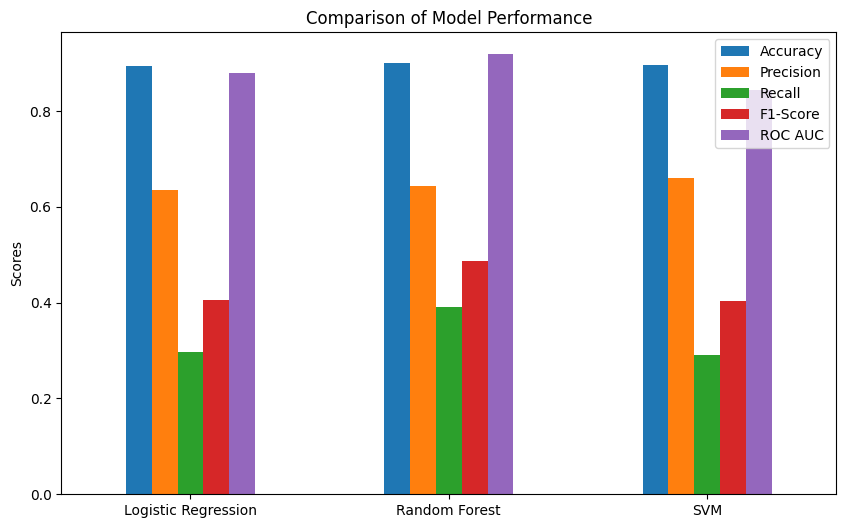

In [65]:
# Transposer le DataFrame pour avoir les métriques en lignes
results.T.plot(kind='bar', figsize=(10, 6))
plt.savefig('model_performance_comparison.png', format='png') 
plt.title('Comparison of Model Performance')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()


Courbe ROC pour chaque modèle

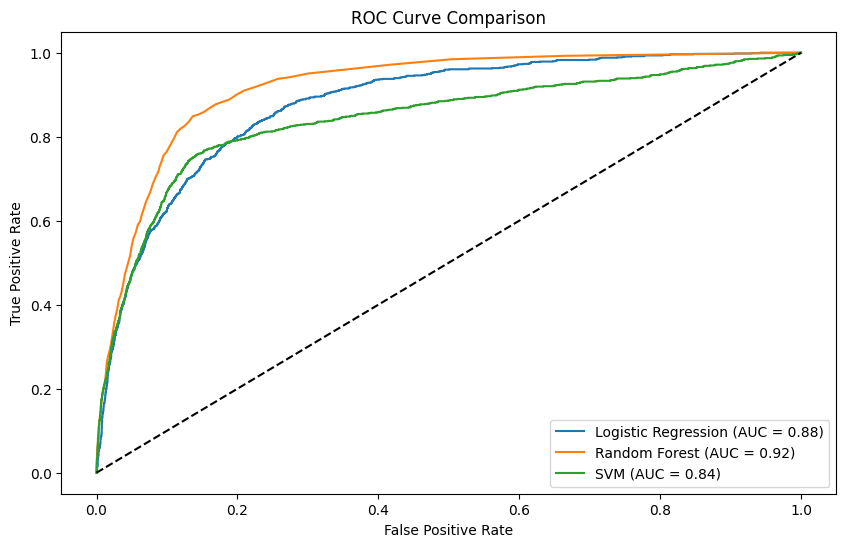

In [64]:
# Tracer la courbe ROC pour chaque modèle
plt.figure(figsize=(10, 6))

# Courbe ROC pour la régression logistique
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_log_reg_prob):.2f})")

# Courbe ROC pour la forêt aléatoire
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_rf_prob):.2f})")

# Courbe ROC pour le SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_prob)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_score(y_test, y_pred_svm_prob):.2f})")

# Légende et affichage
plt.plot([0, 1], [0, 1], 'k--')  # Courbe aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.savefig('roc_curve_comparison.png', format='png') 
plt.show()
